# Backpropagation

Here is a quick representation of the backpropagation algorithm for the simple two node network.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##  Steps to backpropagation

We outlined 4 steps to perform backpropagation,

   1. Choose random initial weights.
   2. Fix input at desired value, and calculate output.
   3. Update the weights.
   4. Repeat steps 2 & 3 many times.

Let's now implement these steps.

### First, let's generate some data using known values for the weights

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))     # Define the sigmoid anonymous function.

def feedforward(w, s0):  # Define feedforward solution.
    x1 = w[0]*s0                  # ... activity of first neuron,
    s1 = sigmoid(x1)            # ... output of first neuron,
    x2 = w[1]*s1                  # ... activity of second neuron,
    s2 = sigmoid(x2)            # ... output of second neuron,
    out= w[2]*s2                  # Output of neural network.
    return out,s1,s2

In [3]:
# Create fake data
w_true  = [-0.33,1.44,0.5]              # Set true weights
out_true,in_true = [], []
K = 1000
for k in np.arange(K):                  # Generate 1000 samples, 
    s0 = 10*np.random.randn(1)           # ... with random input,
    out,s1,s2= feedforward(w_true, s0)  # ... compute the output,
    out_true = np.append(out_true, out) # ... and save it.
    in_true  = np.append(in_true,  s0)  # ... also save the input.

### Now, let's train the neural network with these (inputs,outputs) data.

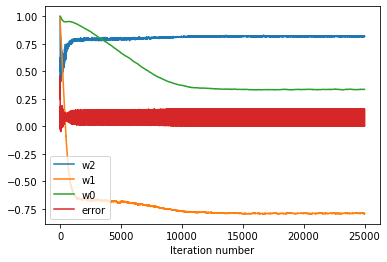

In [11]:
w     = [1,1,1]                          # Choose initial values for the weights.
alpha = 0.5                    # Set the learning constant.

J = 25000
results = np.zeros([J,4])    # Define a variable to hold the results of each iteration.    

for j in np.arange(J):
    k = np.random.randint(0,K)
    s0     = in_true[k]         # Define the input,
    target = out_true[k]        # ... and the target output.
    
    #Step 2. Calculate feedforward solution to get output.
    out,s1,s2    = feedforward(w, s0)
    
    #Step 3. Update the weights.
    w[2] = w[2] - alpha*(out-target)*s2
    w[1] = w[1] - alpha*(out-target)*(w[2]*s2*(1-s2)*s1)
    w[0] = w[0] - alpha*(out-target)*(w[2]*s2*(1-s2)*w[1])*(s1*(1-s1)*s0)
    
    # Save the results of this step! --------------------------------------
    results[j,:] = [w[0],w[1],w[2],  out]
    # Here we save the 3 weights, the neural network output.

plt.clf()
plt.plot(results[:,2], label='w2')
plt.plot(results[:,1], label='w1')
plt.plot(results[:,0], label='w0')
plt.plot(results[:,3]-target, label='error')
#plt.plot(np.arange(1000), 1000*[target], 'k', label='target')  #... and plot the *target*.
plt.legend() #Include a legend,
plt.xlabel('Iteration number');         #... and axis label.

In [12]:
# Print the true and NN weights
print(w_true)
print(results[-1,0:3])

[-0.33, 1.44, 0.5]
[ 0.33652112 -0.79213908  0.81952723]


In [13]:
# Test the NN
s0 = 0
print('True weights output:', feedforward(w_true, s0)[0])
print('  NN weights output:', feedforward(w,      s0)[0])

True weights output: 0.3363035085338802
  NN weights output: 0.32966059707974255
